## Load in data

In [2]:
import pandas as pd
import numpy as np
import nltk

data = pd.read_csv('./data/data.csv', sep=',', dtype=None)

In [3]:
data.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


The last five columns are not valuable so let's get rid of them

In [4]:
cols = [0,3,4,5,6,7]
data.drop(data.columns[cols], axis=1, inplace=True)

let's now replace the class to 0 and 1s (flagged=1)

In [5]:
data['class'].replace('not_flagged', 0, inplace=True)
data['class'].replace('flagged', 1, inplace=True)

In [6]:
data.head()

,class,response_text
0,0,I try and avoid this sort of conflict
1,1,Had a friend open up to me about his mental ad...
2,1,I saved a girl from suicide once. She was goin...
3,0,i cant think of one really...i think i may hav...
4,0,Only really one friend who doesn't fit into th...


let's see the distribution of the class

In [7]:
data['class'].value_counts()

0    55
1    25
Name: class, dtype: int64

## Preprocessing and Visualization of Data

we will first lower case each word, remove punctuations and remove stopwords

In [8]:
import string
from nltk.corpus import stopwords

# Removing punctuations
def removePunctuation(s):
    translator = str.maketrans('', '', string.punctuation)
    return s.translate(translator)

# Lowercasing words and removing stopwords
def lowerCaseStopWords(s):
    sw = stopwords.words('english')
    np.array(sw)
    
    s = [word.lower() for word in s.split() if word.lower() not in sw]
    return " ".join(s)

data['response_text'] = data['response_text'].apply(removePunctuation)
data['response_text'] = data['response_text'].apply(lowerCaseStopWords)

data.head()

,class,response_text
0,0,try avoid sort conflict
1,1,friend open mental addiction weed taking life ...
2,1,saved girl suicide going swallow bunch pills t...
3,0,cant think one reallyi think may indirectly
4,0,really one friend doesnt fit categories therap...


let's now tokenize each response_text, stem each example and look at the length of our examples

In [9]:
from nltk.tokenize import RegexpTokenizer
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical

rxtokenizer = RegexpTokenizer(r'\w+')

data['tokens'] = data['response_text'].apply(rxtokenizer.tokenize)
data.head()

Using TensorFlow backend.


,class,response_text,tokens
0,0,try avoid sort conflict,"[try, avoid, sort, conflict]"
1,1,friend open mental addiction weed taking life ...,"[friend, open, mental, addiction, weed, taking..."
2,1,saved girl suicide going swallow bunch pills t...,"[saved, girl, suicide, going, swallow, bunch, ..."
3,0,cant think one reallyi think may indirectly,"[cant, think, one, reallyi, think, may, indire..."
4,0,really one friend doesnt fit categories therap...,"[really, one, friend, doesnt, fit, categories,..."


lets now use a lemmatize to represent related words by their base string. lemmatize is important with the small dataset we have.

In [25]:
from spacy.lang.en.lemmatizer import LOOKUP
from spacy.lang.en import English

def get_lemma(text):
    return LOOKUP.get(text, text) # if no lemma found, return original text

def lemmatize(tokens):
    lemmatized_tokens = []
    for w in tokens:
        lemmatized_tokens.append(get_lemma(w))
    return lemmatized_tokens
def lemmatize_string(response):
    lemmatized_response = []
    for w in response.split(' '):
        new_w = get_lemma(w)
        lemmatized_response.append(new_w)
    return lemmatized_response

data['tokens'] = data['tokens'].apply(lemmatize)
data['response_text'] = data['response_text'].apply(lemmatize_string)
        
data.head()

,class,response_text,tokens
0,0,"[try, avoid, sort, conflict]","[try, avoid, sort, conflict]"
1,1,"[friend, open, mental, addiction, wee, take, l...","[friend, open, mental, addiction, wee, take, l..."
2,1,"[save, girl, suicide, go, swallow, bunch, pill...","[save, girl, suicide, go, swallow, bunch, pill..."
3,0,"[cant, think, one, reallyi, think, may, indire...","[cant, think, one, reallyi, think, may, indire..."
4,0,"[really, one, friend, doesnt, fit, category, t...","[really, one, friend, doesnt, fit, category, t..."


In [26]:
all_words = [w for tokens in data['tokens'] for w in tokens]
word_count = nltk.FreqDist(all_words)
vocab = list(set(all_words))
lengths = [len(tokens) for tokens in data['tokens']]

print("Vocabulary size: %s" % len(vocab))

Vocabulary size: 474


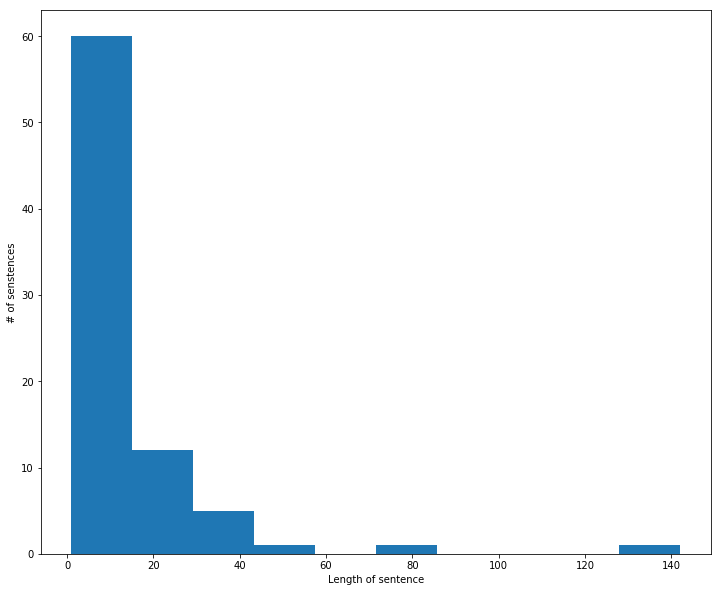

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
plt.hist(lengths)
plt.xlabel("Length of sentence")
plt.ylabel("# of senstences")
plt.show()

let's take a look at the longest response

In [28]:
print(max(data['tokens'], key=len))

['friend', 'would', 'go', 'girl', 'get', 'super', 'depress', 'tell', 'go', 'kill', 'one', 'night', 'drive', '1n', 'hour', 'half', 'go', 'look', 'cop', 'already', 'take', 'hospital', 'friend', 'go', 'hang', 'also', 'help', 'try', 'talk', 'another', 'person', 'hadnt', 'friend', 'year', 'cause', 'stuff', 'call', 'blue', 'thankgiving', 'last', 'year', 'call', 'back', 'get', 'hospital', 'numb', 'know', 'something', 'end', 'kid', 'friend', 'year', 'huge', 'douche', 'psych', 'ward', 'try', 'kill', 'get', 'hold', 'talk', 'whenever', 'would', 'call', 'would', 'answer', 'even', 'though', 'still', 'shit', 'year', 'early', 'mind', 'people', 'may', 'want', 'around', 'situation', 'like', 'ill', 'people', 'goal', 'purpose', 'life', 'thats', 'sustain', 'survival', 'help', 'make', 'people', 'live', 'little', 'bite', 'good', 'make', 'people', 'laugh', 'theyre', 'sad', 'help', 'people', 'nobody', 'else', 'basically', 'treat', 'human', 'even', 'strange', 'respect', 'kindness', 'friend', 'thats', 'people',

In [29]:
print(word_count.most_common(15))

[('friend', 51), ('help', 33), ('talk', 25), ('go', 24), ('people', 22), ('good', 19), ('try', 14), ('get', 13), ('listen', 12), ('think', 11), ('feel', 11), ('one', 9), ('would', 9), ('problem', 9), ('need', 9)]


now let's try to see the most common words grouped by sentiment

In [30]:
flagged_data = data.loc[data['class'] == 1]
not_flagged_data = data.loc[data['class'] == 0]

flagged_words = [w for tokens in flagged_data['tokens'] for w in tokens]
flagged_count = nltk.FreqDist(flagged_words)

not_flagged_words = [w for tokens in not_flagged_data['tokens'] for w in tokens]
not_flagged_count = nltk.FreqDist(not_flagged_words)

print(flagged_count.most_common(30))

[('friend', 24), ('go', 14), ('help', 14), ('talk', 11), ('people', 11), ('get', 9), ('good', 9), ('try', 8), ('depression', 7), ('year', 6), ('would', 6), ('addiction', 5), ('make', 5), ('anxiety', 5), ('school', 5), ('one', 5), ('life', 4), ('find', 4), ('issue', 4), ('think', 4), ('deal', 4), ('back', 4), ('kill', 4), ('use', 4), ('girl', 3), ('suicide', 3), ('way', 3), ('can', 3), ('say', 3), ('severe', 3)]


In [31]:
print(not_flagged_count.most_common(30))

[('friend', 27), ('help', 19), ('talk', 14), ('people', 11), ('go', 10), ('good', 10), ('listen', 9), ('feel', 9), ('think', 7), ('problem', 7), ('know', 7), ('do', 7), ('try', 6), ('someone', 6), ('always', 6), ('need', 6), ('come', 6), ('lot', 6), ('girl', 5), ('im', 5), ('one', 4), ('really', 4), ('call', 4), ('time', 4), ('ive', 4), ('let', 4), ('open', 4), ('sometimes', 4), ('issue', 4), ('life', 4)]


because 80 samples won't enough for us, we will use wordnet from nltk to do some data augmentation

In [21]:
data.to_pickle("./data/processeddata.pickle")

### Checkpoint

In [62]:
import pandas as pd
import numpy as np
import nltk

data = pd.read_pickle("./data/processeddata.pickle")
data.head()

,class,response_text,tokens
0,0,try avoid sort conflict,"[try, avoid, sort, conflict]"
1,1,friend open mental addiction weed taking life ...,"[friend, open, mental, addiction, wee, take, l..."
2,1,saved girl suicide going swallow bunch pills t...,"[save, girl, suicide, go, swallow, bunch, pill..."
3,0,cant think one reallyi think may indirectly,"[cant, think, one, reallyi, think, may, indire..."
4,0,really one friend doesnt fit categories therap...,"[really, one, friend, doesnt, fit, category, t..."


In [63]:
import spacy

nlp = spacy.load('en_default', parser=False)

d = {'class': [], 'response_text': [], 'tokens': []}
generated = pd.DataFrame(columns=['class', 'response_text', 'tokens'])

new_list = []

negative_words = {'severe':[], 'kill':[],'depression':[], 'anxiety':[], 'drug':[], 'addiction':[], 'suicide':[], 'help':[]}
positive_words = {'open':[], 'listen':[], 'life':[], 'always':[], 'help':[]}
def get_related(w):
    word = nlp.vocab[w]
    filtered_words = [w for w in word.vocab if w.is_lower == word.is_lower and w.prob >= -15]
    similarity = sorted(filtered_words, key=lambda w: word.similarity(w), reverse=True)
    return [w.lower_ for w in similarity[:5]]

for word in negative_words:
    negative_words[word] = get_related(word)
    
for word in positive_words:
    positive_words[word] = get_related(word)

def create_new_sentences(tokens, target_words, c):
    generated = pd.DataFrame(columns=['class', 'response_text', 'tokens'])
    for word in target_words:
        if word in tokens:
            for syn in target_words[word][1:]:
                new_tokens = tokens
                
                for i, n in enumerate(new_tokens):
                    if n == word:
                        #print("replacing %s with %s" % (n, syn))
                        new_tokens[i] = syn
                #print(new_tokens)
                string = " ".join(str(x) for x in new_tokens)
                temp = pd.DataFrame([[c, string, new_tokens]], columns=['class','response_text', 'tokens'])
                generated = generated.append(temp)
                new_list.append(temp)
                #generated.append({'class':c ,
                #                              'response_text':string, 
                #                              'tokens':new_tokens}, ignore_index=True )
                #print(generated)
    return generated

for index, row in data.iterrows():
    if row['class'] == 1:
        data = data.append(create_new_sentences(row['tokens'], negative_words, 1))
    else:
        data = data.append(create_new_sentences(row['tokens'], positive_words, 0))
        
data

,class,response_text,tokens
0,0,try avoid sort conflict,"[try, avoid, sort, conflict]"
1,1,friend open mental addiction weed taking life ...,"[friend, open, mental, alcoholism, wee, take, ..."
2,1,saved girl suicide going swallow bunch pills t...,"[save, girl, suicidal, go, swallow, bunch, pil..."
3,0,cant think one reallyi think may indirectly,"[cant, think, one, reallyi, think, may, indire..."
4,0,really one friend doesnt fit categories therap...,"[really, one, friend, doesnt, fit, category, t..."
5,0,couple years ago friends going switch school l...,"[couple, year, ago, friend, go, switch, school..."
6,1,roommate going death loss gf anything get bedroom,"[roommate, go, death, loss, gf, anything, get,..."
7,1,ive couple friends could say friends quite sev...,"[ive, couple, friend, can, say, friend, quite,..."
8,0,listened someone talk relationship troubles of...,"[listening, someone, talk, relationship, troub..."
9,1,always listen comforted sister lost virgity ni...,"[always, listen, comfort, sister, lose, virgit..."


In [65]:
data.to_pickle("./data/newprocesseddata.pickle")